<a href="https://colab.research.google.com/github/anmol0720/Classify-Fashion-Items-Using-Neural-Netwroks/blob/master/Classify_Fashion_Items_Using_Neural_Netwroks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as npl
import matplotlib.pyplot as plt

In [0]:
import tensorflow as tf

In [0]:
from tensorflow import keras

In [156]:
tf.__version__

'2.2.0-rc3'

In [157]:
keras.__version__

'2.3.0-tf'

In [0]:
fas=keras.datasets.fashion_mnist

In [0]:
(x_train_t,y_train_t),(x_test,y_test)=fas.load_data()

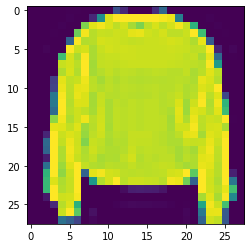

In [160]:
plt.imshow(x_train_t[7])

In [161]:
y_train_t[7]

2

In [0]:
class_name=['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

In [163]:
class_name[y_train_t[7]]

'Pullover'

*These all Categories are Predefined*

In [164]:
x_train_t[7]

array([[  0,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0,  63,  28,
          0,   0,   0,  33,  85,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0,  28, 126, 241, 255, 255,
        255, 255, 255, 255, 252, 248, 111,   0,   0,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2,   0,   0, 206, 244, 251, 241, 230, 238,
        221, 205, 230, 240, 230, 239, 251, 233, 165,   0,   0,   2,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0, 199, 251, 228, 234, 233, 236, 235,
        245, 247, 237, 234, 239, 230, 230, 235, 255, 176,   0,   0,   1,
          0,   0],
       [  0,   0,   0,   0,   0,  81, 254, 226, 228, 239, 237, 236, 234,
        232, 233, 235, 235, 236, 239, 237, 233, 225, 246,  73,   0,   0,
          0,   0],
       [  0,   0,   3,   0,   0, 255, 235, 239, 223, 234, 238, 236, 237,
        236, 235, 235, 235, 235, 236, 235, 234, 230, 231, 255,  24,   0,
          4,   0],
       [  

These Represent Pixel Values Row wise

Data Normalisation

In [0]:
x_train_n=x_train_t/255.
x_test_n=x_test/255.

*255 because we know our upper bound*

Split Data

In [0]:
X_valid,X_train=x_train_n[:5000],x_train_n[5000:]

In [0]:
y_valid,y_train=y_train_t[:5000],y_train_t[5000:]
X_test=x_test_n

In [168]:
X_train.shape

(55000, 28, 28)

In [169]:
y_train.shape

(55000,)

In [170]:
x_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [0]:
np.random.seed(42)
tf.random.set_seed(42)

In [0]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28*28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [173]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_16 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


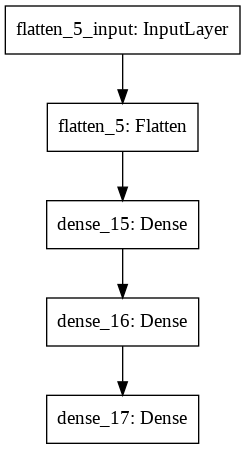

In [174]:
import pydot
keras.utils.plot_model(model)

In [0]:
weights,biases=model.layers[1].get_weights()

In [176]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [177]:
weights.shape

(784, 300)

In [178]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [179]:
biases.shape

(300,)

In [0]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [181]:
model_history=model.fit(X_train,y_train,epochs=60,
                        validation_data=(X_valid[:5000],y_valid))

Epoch 1/60
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7237 - accuracy: 0.7643 - val_loss: 0.5204 - val_accuracy: 0.8226
Epoch 2/60
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4842 - accuracy: 0.8318 - val_loss: 0.4339 - val_accuracy: 0.8526
Epoch 3/60
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4391 - accuracy: 0.8458 - val_loss: 0.5286 - val_accuracy: 0.7996
Epoch 4/60
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4123 - accuracy: 0.8566 - val_loss: 0.3901 - val_accuracy: 0.8650
Epoch 5/60
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3939 - accuracy: 0.8622 - val_loss: 0.3732 - val_accuracy: 0.8690
Epoch 6/60
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3752 - accuracy: 0.8675 - val_loss: 0.3704 - val_accuracy: 0.8724
Epoch 7/60
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3631 - accuracy: 0.8716 - val_loss: 0.3603 - val_accuracy:

In [182]:
model_history.params

{'epochs': 60, 'steps': 1719, 'verbose': 1}

In [183]:
model_history.history

{'accuracy': [0.7643091082572937,
  0.831781804561615,
  0.8457818031311035,
  0.8565636277198792,
  0.8622363805770874,
  0.8675454258918762,
  0.8715817928314209,
  0.8747454285621643,
  0.8793454766273499,
  0.8820545673370361,
  0.8839091062545776,
  0.8865454792976379,
  0.8896363377571106,
  0.8916545510292053,
  0.8939999938011169,
  0.8971454501152039,
  0.8979091048240662,
  0.9006181955337524,
  0.902363657951355,
  0.9035817980766296,
  0.9055818319320679,
  0.9071454405784607,
  0.9085999727249146,
  0.9103817939758301,
  0.9126545190811157,
  0.9137818217277527,
  0.9155091047286987,
  0.9166181683540344,
  0.9180545210838318,
  0.9203454256057739,
  0.919945478439331,
  0.922109067440033,
  0.9225999712944031,
  0.924963653087616,
  0.9265090823173523,
  0.9261636137962341,
  0.9282363653182983,
  0.9298545718193054,
  0.9300727248191833,
  0.932163655757904,
  0.9326909184455872,
  0.9337272644042969,
  0.9354363679885864,
  0.936054527759552,
  0.9363454580307007,
  0.9

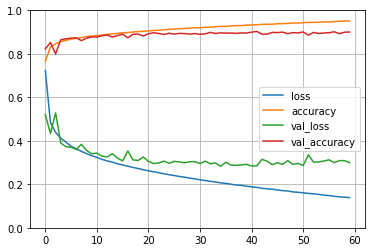

In [184]:
pd.DataFrame(model.history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [185]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.3399 - accuracy: 0.8899


[0.3399046063423157, 0.8899000287055969]

Prediction

In [0]:
x_new=X_test[:3]
#New unseen data

In [187]:
y_prob=model.predict(x_new)
y_prob.round(2)
#Predicting the Values of corrosponding class

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [188]:
pred=model.predict_classes(x_new)
pred
#Predicting classes

array([9, 2, 1])

In [193]:
np.array(class_name)[pred]

array(['Ankle Boot', 'Pullover', 'Trouser'], dtype='<U11')

AxesImage(54,36;334.8x217.44)


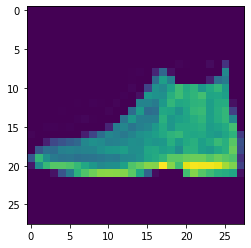

In [190]:
print(plt.imshow(x_test[0]))

AxesImage(54,36;334.8x217.44)


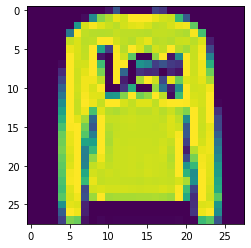

In [191]:
print(plt.imshow(x_test[1]))

AxesImage(54,36;334.8x217.44)


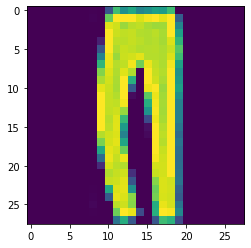

In [192]:
print(plt.imshow(x_test[2]))